In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [28]:
# read the data from /input/train.csv
data = pd.read_csv("./input/train.csv")

In [8]:
X = data.drop(['Class', 'id'], axis=1)
y = data['Class']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
test_losses = {}
train_losses = {}

## Random Forest from SKLearn

In [13]:
RF = RandomForestClassifier(n_estimators=256, max_depth=3, random_state=42)

# fit the model
RF.fit(X_train, y_train)

# predict the probabilities
y_pred_RF = RF.predict_proba(X_test)

# calculate the log loss
loss_RF = log_loss(y_test, y_pred_RF)

test_losses['RF'] = loss_RF

# to check for overfitting
train_loss_RF = log_loss(y_train, RF.predict_proba(X_train))
train_losses['RF'] = train_loss_RF

## XGBoost

In [18]:
XGB = xgb.XGBClassifier(n_estimators=1024, max_depth=3, learning_rate=0.02, random_state=42)

# fit the model
XGB.fit(X_train, y_train)

# predict the probabilities
y_pred_XGB = XGB.predict_proba(X_test)

# calculate the log loss
loss_XGB = log_loss(y_test, y_pred_XGB)

test_losses['XGB'] = loss_XGB

# to check for overfitting
train_loss_XGB = log_loss(y_train, XGB.predict_proba(X_train))
train_losses['XGB'] = train_loss_XGB

## LightGBM

In [19]:
LGB = lgb.LGBMClassifier(n_estimators=1024, max_depth=3, learning_rate=0.02, random_state=42)

# fit the model
LGB.fit(X_train, y_train)

# predict the probabilities
y_pred_LGB = LGB.predict_proba(X_test)

# calculate the log loss
loss_LGB = log_loss(y_test, y_pred_LGB)

test_losses['LGB'] = loss_LGB

# to check for overfitting
train_loss_LGB = log_loss(y_train, LGB.predict_proba(X_train))
train_losses['LGB'] = train_loss_LGB

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

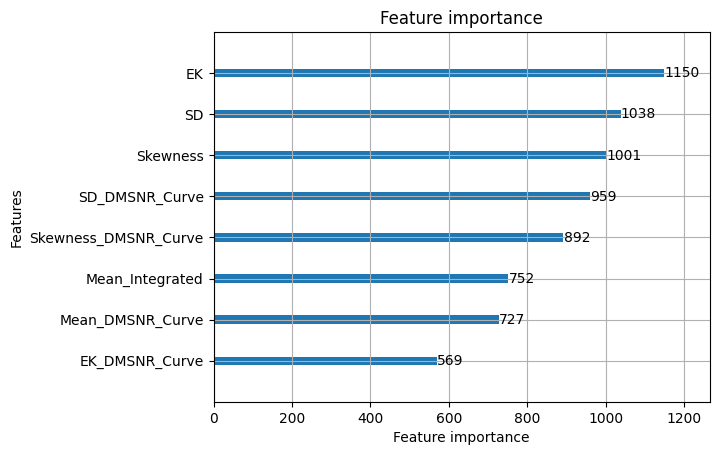

In [27]:
# plot the feature importance
lgb.plot_importance(LGB, max_num_features=10)


## CatBoost

In [22]:
CB = cb.CatBoostClassifier(n_estimators=1024, max_depth=3, learning_rate=0.02, random_state=42)

# fit the model
CB.fit(X_train, y_train)

# predict the probabilities
y_pred_CB = CB.predict_proba(X_test)

# calculate the log loss
loss_CB = log_loss(y_test, y_pred_CB)

test_losses['CB'] = loss_CB

# to check for overfitting
train_loss_CB = log_loss(y_train, CB.predict_proba(X_train))
train_losses['CB'] = train_loss_CB

0:	learn: 0.6451825	total: 16.6ms	remaining: 17s
1:	learn: 0.5995212	total: 30.3ms	remaining: 15.5s
2:	learn: 0.5558367	total: 41.5ms	remaining: 14.1s
3:	learn: 0.5135084	total: 54.3ms	remaining: 13.8s
4:	learn: 0.4768439	total: 70.2ms	remaining: 14.3s
5:	learn: 0.4393969	total: 82.9ms	remaining: 14.1s
6:	learn: 0.4094355	total: 96.1ms	remaining: 14s
7:	learn: 0.3791343	total: 107ms	remaining: 13.6s
8:	learn: 0.3548655	total: 119ms	remaining: 13.4s
9:	learn: 0.3324440	total: 131ms	remaining: 13.3s
10:	learn: 0.3082184	total: 142ms	remaining: 13.1s
11:	learn: 0.2897665	total: 154ms	remaining: 13s
12:	learn: 0.2699018	total: 165ms	remaining: 12.8s
13:	learn: 0.2539513	total: 176ms	remaining: 12.7s
14:	learn: 0.2361057	total: 186ms	remaining: 12.5s
15:	learn: 0.2209904	total: 197ms	remaining: 12.4s
16:	learn: 0.2083144	total: 208ms	remaining: 12.3s
17:	learn: 0.1935369	total: 220ms	remaining: 12.3s
18:	learn: 0.1814888	total: 233ms	remaining: 12.3s
19:	learn: 0.1706253	total: 246ms	remain

## Model Comparison

In [26]:
# compare the losses
for model, loss in test_losses.items():
    print(f"{model} test loss: {loss}")
print("-"*50)
for model, loss in train_losses.items():
    print(f"{model} train loss: {loss}")

RF test loss: 0.04099004084544929
XGB test loss: 0.03268741574212759
LGB test loss: 0.032650497996760584
CB test loss: 0.032612276089636745
--------------------------------------------------
RF train loss: 0.04023381523531715
XGB train loss: 0.02624511811895606
LGB train loss: 0.026360253197102695
CB train loss: 0.029284491125716308
